# Supply Chain Fraud Detection Preprocessing
This notebook performs data preprocessing, feature engineering, and graph construction based on the DataCo Supply Chain dataset.

In [204]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime


In [205]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data/DataCoSupplyChainDataset.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preview
print("Shape:", df.shape)
df.head()

Shape: (180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [207]:
# List of irrelevant or sensitive fields to drop
columns_to_drop = [
    'Customer Email', 'Customer Password', 'Product Image', 'Product Description', 'Order Zipcode',
    'Latitude', 'Longitude', 'Customer Street', 'Customer State', 'Order State', 'Order City',
    'Department Id', 'Department Name', 'Order Country', 'Product Card Id', 'Order Item Cardprod Id',
    'Product Category Id', 'Type', 'Customer Zipcode'
]

# Drop them
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Confirm shape
print("Remaining columns:", df.shape[1])
df.head()

Remaining columns: 34


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,...,Sales,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,...,327.75,314.640015,91.250000,Southeast Asia,COMPLETE,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,...,327.75,311.359985,-249.089996,South Asia,PENDING,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,...,327.75,309.720001,-247.779999,South Asia,CLOSED,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,...,327.75,304.809998,22.860001,Oceania,COMPLETE,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,...,327.75,298.250000,134.210007,Oceania,PENDING_PAYMENT,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [208]:
# Show missing value counts
missing_summary = df.isnull().sum()
print("Missing values summary:\n", missing_summary[missing_summary > 0])

# Drop rows with missing critical identifiers or numeric values
df.dropna(subset=['Order Id', 'Customer Id', 'Product Name', 'Product Price'], inplace=True)

# Fill missing numeric fields with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Example: Standardize some inconsistent category values (optional)
df['Delivery Status'] = df['Delivery Status'].str.strip().str.lower().replace({
    'delayed': 'late delivery',
    'on-time': 'delivered on time'
})

print("Post-cleaning shape:", df.shape)
df.head()


Missing values summary:
 Customer Lname    8
dtype: int64
Post-cleaning shape: (180519, 34)


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,...,Sales,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,3,4,91.250000,314.640015,advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,...,327.75,314.640015,91.250000,Southeast Asia,COMPLETE,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,5,4,-249.089996,311.359985,late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,...,327.75,311.359985,-249.089996,South Asia,PENDING,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,4,4,-247.779999,309.720001,shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,...,327.75,309.720001,-247.779999,South Asia,CLOSED,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,3,4,22.860001,304.809998,advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,...,327.75,304.809998,22.860001,Oceania,COMPLETE,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,2,4,134.210007,298.250000,advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,...,327.75,298.250000,134.210007,Oceania,PENDING_PAYMENT,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [209]:
# Normalize useful categorical text columns
text_cols = [
    'Customer Segment',
    'Market',
    'Shipping Mode',
    'Product Name',
    'Delivery Status',
    'Order Status',
    'Order Region',
    'Customer Country',
    'Category Name']
for col in text_cols:
    df[col] = df[col].str.lower()


In [210]:
# Drop exact duplicate rows, if any
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Dropped {before - after} duplicate rows.")


Dropped 0 duplicate rows.


In [211]:
# Convert order and shipping dates to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

# Calculate shipping delay in days
df['Shipping Delay'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.days

# Extract temporal features from order date
df['Order DayOfWeek'] = df['order date (DateOrders)'].dt.dayofweek  # 0 = Monday
df['Order Month'] = df['order date (DateOrders)'].dt.month
df['Order Hour'] = df['order date (DateOrders)'].dt.hour

# Show a few rows with new features
df[['order date (DateOrders)', 'shipping date (DateOrders)', 'Shipping Delay', 'Order DayOfWeek', 'Order Month', 'Order Hour']].head()


,order date (DateOrders),shipping date (DateOrders),Shipping Delay,Order DayOfWeek,Order Month,Order Hour
0,2018-01-31 22:56:00,2018-02-03 22:56:00,3,2,1,22
1,2018-01-13 12:27:00,2018-01-18 12:27:00,5,5,1,12
2,2018-01-13 12:06:00,2018-01-17 12:06:00,4,5,1,12
3,2018-01-13 11:45:00,2018-01-16 11:45:00,3,5,1,11
4,2018-01-13 11:24:00,2018-01-15 11:24:00,2,5,1,11


In [212]:
# Profit margin: how much profit is made per dollar of sales
df['profit_margin'] = df['Order Profit Per Order'] / df['Sales']
df['profit_margin'] = df['profit_margin'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Shipping delay: actual vs scheduled shipping time
df['shipping_delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# Unit discount: discount normalized by quantity
df['unit_discount'] = df['Order Item Discount'] / df['Order Item Quantity']
df['unit_discount'] = df['unit_discount'].replace([np.inf, -np.inf], np.nan).fillna(0)

# High discount flag (e.g., over 50%)
df['is_high_discount'] = (df['Order Item Discount Rate'] > 0.5).astype(int)

# Large order flag (e.g., more than 10 items)
df['is_large_order'] = (df['Order Item Quantity'] > 10).astype(int)

# Show a few rows of new features
df[['profit_margin', 'shipping_delay', 'unit_discount', 'is_high_discount', 'is_large_order']].head()


,profit_margin,shipping_delay,unit_discount,is_high_discount,is_large_order
0,0.278413,-1,13.110000,0,0
1,-0.760000,1,16.389999,0,0
2,-0.756003,0,18.030001,0,0
3,0.069748,-1,22.940001,0,0
4,0.409489,-2,29.500000,0,0


In [213]:
# Initialize with 0s
df['fraud_label'] = 0

# Apply fraud conditions
df.loc[
    (df['Order Item Discount Rate'] > 0.8) |  # excessive discount
    (df['Late_delivery_risk'] == 1) & (df['Delivery Status'].str.lower() == 'delivered on time') |  # mismatch
    (df['Order Profit Per Order'] < 0) & (df['Sales'] > 500) |  # negative profit despite high sales
    (df['shipping_delay'] > 30) |  # unreasonable delay
    (df['is_high_discount'] == 1) & (df['is_large_order'] == 1) |  # bulk order with deep discount
    (
        (df['Order Item Discount Rate'] > 0.5) & (df['Order Item Quantity'] > 3)
    ) |
    (
        (df['profit_margin'] < 0.1) & (df['Sales'] > 400)
    ) |
    (
        (df['shipping_delay'] > 20) & (df['Late_delivery_risk'] == 1)
    ) |
    (
        (df['Order Item Discount Rate'] > 0.3) & (df['Order Item Total'] > 1000)
    ) |
    (
        (df['Order Status'].str.lower() == 'pending') & (df['Late_delivery_risk'] == 1)
    ),
    'fraud_label'
] = 1

# Check class distribution
print(df['fraud_label'].value_counts())
print("Fraud label distribution:\n", df['fraud_label'].value_counts())
df[df['fraud_label'] == 1][['Order Id', 'fraud_label']].head(10)  # Show fraudulent rows



fraud_label
0    167462
1     13057
Name: count, dtype: int64
Fraud label distribution:
 fraud_label
0    167462
1     13057
Name: count, dtype: int64


,Order Id,fraud_label
1,75939,1
11,75929,1
12,75928,1
21,75919,1
22,75918,1
26,75914,1
45,75895,1
46,75894,1
92,4919,1
93,52640,1


In [214]:
from sklearn.preprocessing import StandardScaler

# List of numeric features to scale
features_to_scale = [
    'Sales',
    'Order Profit Per Order',
    'Shipping Delay',
    'shipping_delay',
    'Order Item Discount',
    'Order Item Discount Rate',
    'Order Item Quantity',
    'Order Item Total',
    'unit_discount',
    'profit_margin'
]

# Replace inf/nan values if any remain
df[features_to_scale] = df[features_to_scale].replace([np.inf, -np.inf], np.nan).fillna(0)

# Initialize scaler and apply
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[features_to_scale])

# Add scaled versions back to dataframe
scaled_df = pd.DataFrame(scaled_values, columns=[f'{col}_scaled' for col in features_to_scale])
df = pd.concat([df, scaled_df], axis=1)

# Preview
df[[f'{col}_scaled' for col in features_to_scale]].head()


,Sales_scaled,Order Profit Per Order_scaled,Shipping Delay_scaled,shipping_delay_scaled,Order Item Discount_scaled,Order Item Discount Rate_scaled,Order Item Quantity_scaled,Order Item Total_scaled,unit_discount_scaled,profit_margin_scaled
0,0.93729,0.663343,-0.282470,-1.050199,-0.346534,-0.875782,-0.775836,1.095708,-0.060789,0.404399
1,0.93729,-2.595582,0.914801,0.291216,-0.196082,-0.733767,-0.775836,1.068384,0.103475,-2.064530
2,0.93729,-2.583038,0.316165,-0.379492,-0.120855,-0.591751,-0.775836,1.054722,0.185606,-2.055027
3,0.93729,0.008474,-0.282470,-1.050199,0.104366,-0.449736,-0.775836,1.013820,0.431501,-0.091723
4,0.93729,1.074706,-0.881105,-1.720907,0.405271,-0.165706,-0.775836,0.959174,0.760027,0.716044


In [215]:
# Final cleanup: drop unneeded columns before graph construction
columns_to_drop = [
    # Redundant or unused
    'Customer City', 'Category Id', 'Sales per customer', 'Benefit per order',
    'Order Item Product Price', 'Order Item Profit Ratio',
    'Days for shipping (real)', 'Days for shipment (scheduled)',

    # Unscaled versions of numerical features
    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Quantity',
    'Product Price', 'Shipping Delay', 'shipping_delay', 'unit_discount', 'profit_margin',

    # Raw dates — optional if not using temporal graphs
    'order date (DateOrders)', 'shipping date (DateOrders)'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Confirm
print("Final columns after pruning:")
print(df.columns.tolist())


Final columns after pruning:
['Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Segment', 'Market', 'Order Customer Id', 'Order Id', 'Order Item Id', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order Status', 'Product Name', 'Product Status', 'Shipping Mode', 'Order DayOfWeek', 'Order Month', 'Order Hour', 'is_high_discount', 'is_large_order', 'fraud_label', 'Sales_scaled', 'Order Profit Per Order_scaled', 'Shipping Delay_scaled', 'shipping_delay_scaled', 'Order Item Discount_scaled', 'Order Item Discount Rate_scaled', 'Order Item Quantity_scaled', 'Order Item Total_scaled', 'unit_discount_scaled', 'profit_margin_scaled']


In [216]:
# Save the cleaned and labeled DataFrame to your Google Drive folder
cleaned_file_path = '/content/drive/MyDrive/Data/cleaned_supply_chain_fraud.csv'

df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: /content/drive/MyDrive/Data/cleaned_supply_chain_fraud.csv


# Graph Construction

In [217]:
# Install torch geometric and dependencies
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install -q torch-geometric


In [218]:
# Stratified sample: preserves the fraud/non-fraud ratio
df_sample = df.groupby('fraud_label', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42)).reset_index(drop=True)

# Check the distribution to confirm stratification
print("Class distribution in sampled dataset:")
print(df_sample['fraud_label'].value_counts(normalize=True))

# Compare with original
print("\nClass distribution in full dataset:")
print(df['fraud_label'].value_counts(normalize=True))


Class distribution in sampled dataset:
fraud_label
0    0.927653
1    0.072347
Name: proportion, dtype: float64

Class distribution in full dataset:
fraud_label
0    0.92767
1    0.07233
Name: proportion, dtype: float64


<ipython-input-218-5ce2d2f7f6df>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('fraud_label', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42)).reset_index(drop=True)


In [219]:
from sklearn.preprocessing import LabelEncoder

# Encode unique node IDs for customers, orders, and products (within the sampled data)
customer_encoder = LabelEncoder()
order_encoder = LabelEncoder()
product_encoder = LabelEncoder()

df_sample['customer_node'] = customer_encoder.fit_transform(df_sample['Customer Id'])
df_sample['order_node'] = order_encoder.fit_transform(df_sample['Order Id'])
df_sample['product_node'] = product_encoder.fit_transform(df_sample['Product Name'])

# Preview encoded IDs
df_sample[['Customer Id', 'customer_node', 'Order Id', 'order_node', 'Product Name', 'product_node']].head()


,Customer Id,customer_node,Order Id,order_node,Product Name,product_node
0,9666,4632,41154,4790,under armour girls' toddler spine surge runni,104
1,3051,1466,57174,6694,nike men's dri-fit victory golf polo,63
2,8683,4174,15087,1773,pelican sunstream 100 kayak,74
3,6539,3166,54807,6404,under armour girls' toddler spine surge runni,104
4,9840,4731,11703,1395,nike men's free 5.0+ running shoe,65


In [220]:
import numpy as np

# CUSTOMER → ORDER edges (one per order)
edges_customer_order = df_sample[['customer_node', 'order_node']].drop_duplicates().to_numpy().T  # shape: [2, num_edges]

# ORDER → PRODUCT edges (can be many per order)
edges_order_product = df_sample[['order_node', 'product_node']].drop_duplicates().to_numpy().T

# Combine into a single edge_index if using homogeneous graph (optional)
edge_index = np.hstack([edges_customer_order, edges_order_product])

print("Customer → Order edges:", edges_customer_order.shape[1])
print("Order → Product edges:", edges_order_product.shape[1])
print("Total edges:", edge_index.shape[1])


Customer → Order edges: 8496
Order → Product edges: 8964
Total edges: 17460


In [221]:
# Select useful features for order nodes
order_node_features = df_sample[[
    'order_node',
    'Sales_scaled',
    'Order Profit Per Order_scaled',
    'Order Item Discount_scaled',
    'Order Item Discount Rate_scaled',
    'Order Item Quantity_scaled',
    'Order Item Total_scaled',
    'unit_discount_scaled',
    'profit_margin_scaled',
    'shipping_delay_scaled',
    'is_high_discount',
    'is_large_order',
    'Order DayOfWeek',
    'Order Month',
    'Order Hour',
    'fraud_label'  # Target label
]].drop_duplicates(subset='order_node').set_index('order_node')

# Aggregate behavior for customer nodes
customer_node_features = df_sample.groupby('customer_node').agg({
    'Sales_scaled': 'mean',
    'Order Item Discount Rate_scaled': 'mean',
    'Order Item Quantity_scaled': 'sum',
    'Customer Segment': 'first',
    'Customer Country': 'first',
    'Market': 'first'
}).reset_index()

# One-hot encode categorical columns
customer_node_features = pd.get_dummies(customer_node_features, columns=['Customer Segment', 'Customer Country', 'Market'])
customer_node_features.set_index('customer_node', inplace=True)

# Aggregate product statistics
product_node_features = df_sample.groupby('product_node').agg({
    'Order Item Quantity_scaled': 'sum',
    'Order Item Total_scaled': 'mean',
    'Category Name': 'first'
}).reset_index()

# One-hot encode product category
product_node_features = pd.get_dummies(product_node_features, columns=['Category Name'])
product_node_features.set_index('product_node', inplace=True)



In [222]:
import torch
from torch_geometric.data import HeteroData

# Initialize the heterogeneous graph
data = HeteroData()

### 1. Assign node features
# Orders
data['order'].x = torch.tensor(order_node_features.drop(columns='fraud_label').values, dtype=torch.float)

# 1. Convert all columns to numeric (in case dummies or encoded columns are still objects)
customer_features_clean = customer_node_features.astype('float32')
product_features_clean = product_node_features.astype('float32')

# 2. Convert to torch tensors
data['customer'].x = torch.tensor(customer_features_clean.values, dtype=torch.float)
data['product'].x = torch.tensor(product_features_clean.values, dtype=torch.float)


### 2. Assign labels (only for orders)
data['order'].y = torch.tensor(order_node_features['fraud_label'].values, dtype=torch.long)

### 3. Add edge indices
# Note: Make sure edges_customer_order and edges_order_product are already defined
data['customer', 'places', 'order'].edge_index = torch.tensor(edges_customer_order, dtype=torch.long)
data['order', 'contains', 'product'].edge_index = torch.tensor(edges_order_product, dtype=torch.long)

# Add reverse edge from product back to order
data['product', 'rev_contains', 'order'].edge_index = \
    data['order', 'contains', 'product'].edge_index[[1, 0]]

### 4. Inspect the result
print(data)
print("\nNode types:", data.node_types)
print("Edge types:", data.edge_types)


HeteroData(
  order={
    x=[8496, 14],
    y=[8496],
  },
  customer={ x=[6399, 13] },
  product={ x=[114, 52] },
  (customer, places, order)={ edge_index=[2, 8496] },
  (order, contains, product)={ edge_index=[2, 8964] },
  (product, rev_contains, order)={ edge_index=[2, 8964] }
)

Node types: ['order', 'customer', 'product']
Edge types: [('customer', 'places', 'order'), ('order', 'contains', 'product'), ('product', 'rev_contains', 'order')]


# Visualize Graph

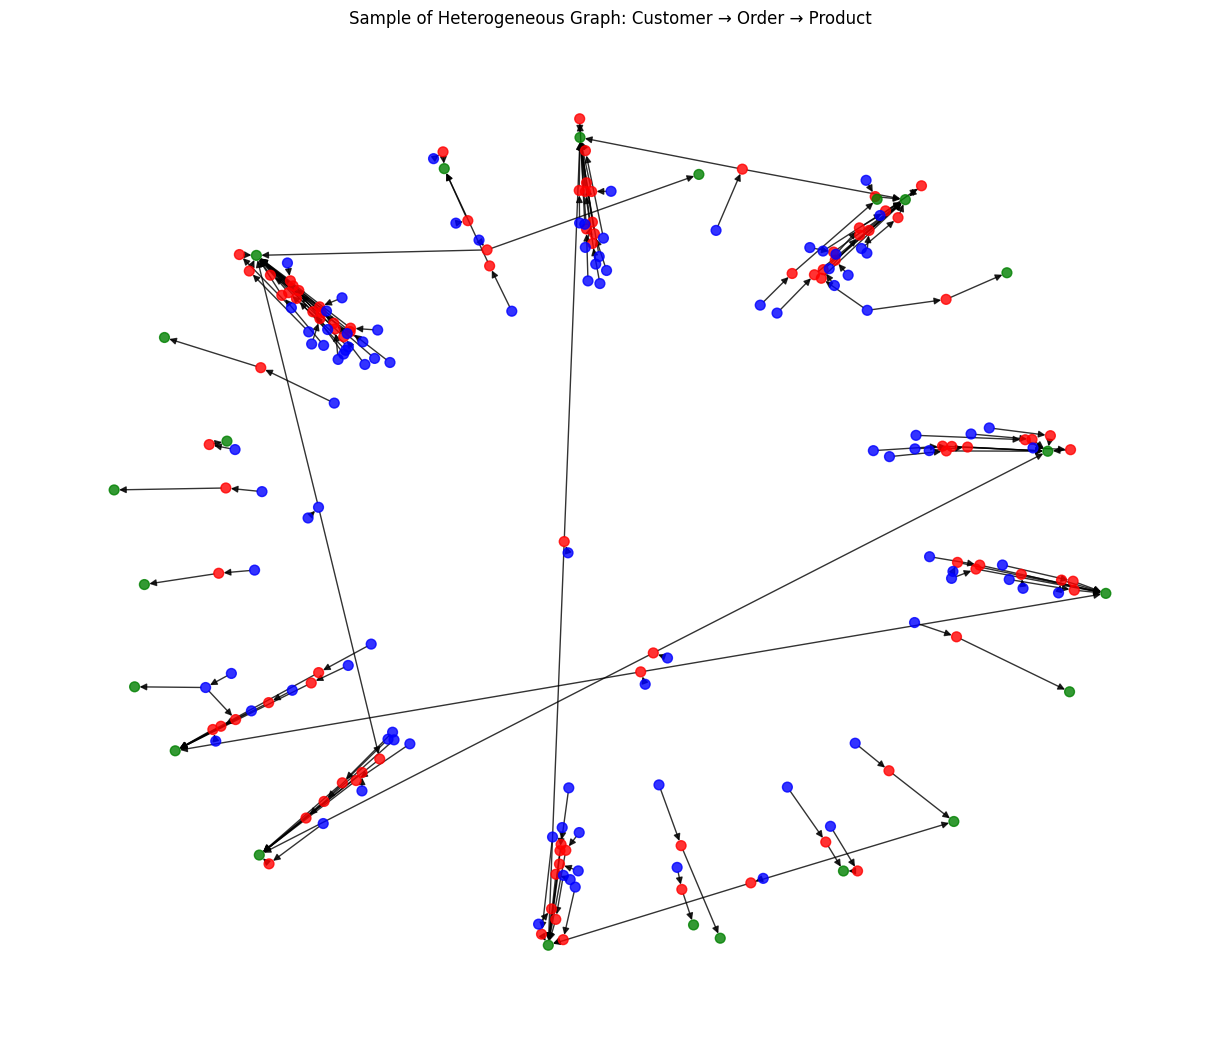

In [223]:
import networkx as nx
import matplotlib.pyplot as plt
import torch

# Sample 100 order nodes
sample_size = 100
order_sample_idx = torch.randperm(data['order'].num_nodes)[:sample_size]
order_sample_set = set(order_sample_idx.tolist())

# Get related customer → order edges
cust_order_edges = data['customer', 'places', 'order'].edge_index
cust_order_mask = torch.isin(cust_order_edges[1], order_sample_idx)
cust_order_edges_sample = cust_order_edges[:, cust_order_mask]

# Get related order → product edges
order_prod_edges = data['order', 'contains', 'product'].edge_index
order_prod_mask = torch.isin(order_prod_edges[0], order_sample_idx)
order_prod_edges_sample = order_prod_edges[:, order_prod_mask]

# Initialize directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(order_sample_idx.tolist(), node_type='order')
G.add_nodes_from(cust_order_edges_sample[0].tolist(), node_type='customer')
G.add_nodes_from(order_prod_edges_sample[1].tolist(), node_type='product')

# Add edges
G.add_edges_from(zip(cust_order_edges_sample[0].tolist(), cust_order_edges_sample[1].tolist()), edge_type='places')
G.add_edges_from(zip(order_prod_edges_sample[0].tolist(), order_prod_edges_sample[1].tolist()), edge_type='contains')

# Color nodes by type
color_map = []
for node in G.nodes(data=True):
    if node[1]['node_type'] == 'order':
        color_map.append('red')
    elif node[1]['node_type'] == 'customer':
        color_map.append('blue')
    else:
        color_map.append('green')

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G, with_labels=False, node_color=color_map, node_size=50, arrows=True, alpha=0.8)
plt.title("Sample of Heterogeneous Graph: Customer → Order → Product")
plt.show()


# Train/Val/Test split

In [250]:
import torch

# Total number of order nodes
num_orders = data['order'].num_nodes

# Randomly shuffle order indices
perm = torch.randperm(num_orders)

# Split sizes
train_size = int(0.7 * num_orders)
val_size = int(0.15 * num_orders)
test_size = num_orders - train_size - val_size

# Assign indices
train_idx = perm[:train_size]
val_idx = perm[train_size:train_size + val_size]
test_idx = perm[train_size + val_size:]

# Create boolean masks
train_mask = torch.zeros(num_orders, dtype=torch.bool)
val_mask = torch.zeros(num_orders, dtype=torch.bool)
test_mask = torch.zeros(num_orders, dtype=torch.bool)

train_mask[train_idx] = True
val_mask[val_idx] = True
test_mask[test_idx] = True

# Assign to the graph
data['order'].train_mask = train_mask
data['order'].val_mask = val_mask
data['order'].test_mask = test_mask

# Confirm
print(f"Train: {train_mask.sum().item()}, Val: {val_mask.sum().item()}, Test: {test_mask.sum().item()}")


Train: 5947, Val: 1274, Test: 1275


# Model Architecture

In [252]:
import torch
import torch.nn.functional as F
from torch import nn
from torch_geometric.nn import HeteroConv, SAGEConv, Linear

class HeteroFraudGNN(nn.Module):
    def __init__(self, metadata, hidden_channels=32, out_channels=1, dropout=0.3):
        super().__init__()

        self.dropout = dropout

        # First layer: message passing from customer → order and order → product
        self.conv1 = HeteroConv({
            ('customer', 'places', 'order'): SAGEConv((-1, -1), hidden_channels),
            ('order', 'contains', 'product'): SAGEConv((-1, -1), hidden_channels),
        }, aggr='sum')

        # Second layer: message passing from product → order (reverse)
        self.conv2 = HeteroConv({
            ('product', 'rev_contains', 'order'): SAGEConv((-1, -1), hidden_channels),
        }, aggr='sum')

        self.lin = Linear(hidden_channels, out_channels)

    def forward(self, x_dict, edge_index_dict):
        # Layer 1
        x1 = self.conv1(x_dict, edge_index_dict)
        x1 = {k: F.relu(v) for k, v in x1.items()}
        x1 = {k: F.dropout(v, p=self.dropout, training=self.training) for k, v in x1.items()}

        # Layer 2 — only order gets updated
        x2 = self.conv2(x1, edge_index_dict)
        x2 = {k: F.relu(v) for k, v in x2.items()}
        x2 = {k: F.dropout(v, p=self.dropout, training=self.training) for k, v in x2.items()}

        return self.lin(x2['order']).squeeze()



class OrderFraudWrapper(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model

    def forward(self, x_dict, edge_index_dict, node_type=None, index=None, target=None):
        return self.base_model(x_dict, edge_index_dict)

    def get_order_embedding(self, x_dict, edge_index_dict):
        with torch.no_grad():
            x_dict = self.base_model.conv1(x_dict, edge_index_dict)
            x_dict = {k: F.relu(v) for k, v in x_dict.items() if v is not None}
            return x_dict['order']


# Training Setup & Loop

In [255]:
import torch
from torch.optim import Adam
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

# 1. Get metadata from HeteroData
metadata = data.metadata()

# 2. Initialize the model
model = HeteroFraudGNN(metadata).to('cpu')  # Switch to 'cuda' if using GPU
wrapped_model = OrderFraudWrapper(model)

# 3. Define optimizer
optimizer = Adam(wrapped_model.parameters(), lr=0.005, weight_decay=5e-4)

# 4. Define class-balanced loss
labels = data['order'].y
num_pos = (labels == 1).sum()
num_neg = (labels == 0).sum()
pos_weight = num_neg / num_pos
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)


print("x_dict keys:", data.x_dict.keys())
print("order feature shape:", data['order'].x.shape)

# 5. Training loop
def train(data, wrapped_model):
    wrapped_model.train()
    optimizer.zero_grad()
    out = wrapped_model(data.x_dict, data.edge_index_dict)

    loss = loss_fn(out[data['order'].train_mask], data['order'].y[data['order'].train_mask].float())
    loss.backward()
    optimizer.step()
    return loss.item()

# 6. Evaluation
@torch.no_grad()
def evaluate(data, wrapped_model, mask_name):
    wrapped_model.eval()
    out = wrapped_model(data.x_dict, data.edge_index_dict)
    preds = torch.sigmoid(out) > 0.5
    mask = data['order'][mask_name]
    y_true = data['order'].y[mask].cpu()
    y_pred = preds[mask].cpu()

    return classification_report(y_true, y_pred, digits=4)
print("Edge Index Shapes and Range Checks:")

for edge_type in data.edge_types:
    ei = data[edge_type].edge_index
    src_type, _, dst_type = edge_type

    print(f"\n{edge_type}:")
    print(f"  edge_index shape: {ei.shape}")
    print(f"  source node range: 0 → {data[src_type].x.shape[0] - 1}")
    print(f"  dest node range:   0 → {data[dst_type].x.shape[0] - 1}")
    print(f"  edge_index max values: {ei[0].max().item()}, {ei[1].max().item()}")


# 7. Run training
epochs = 100
for epoch in tqdm(range(1, epochs + 1)):
    loss = train(data, wrapped_model)
    if epoch % 5 == 0 or epoch == 1:
        print(f"\nEpoch {epoch} - Loss: {loss:.4f}")
        print("Validation Results:\n", evaluate(data, wrapped_model, 'val_mask'))

# Final evaluation
print("\nFinal Test Results:")
print(evaluate(data, wrapped_model, 'test_mask'))



/usr/local/lib/python3.11/dist-packages/torch_geometric/nn/conv/hetero_conv.py:76: UserWarning: There exist node types ({'customer'}) whose representations do not get updated during message passing as they do not occur as destination type in any edge type. This may lead to unexpected behavior.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch_geometric/nn/conv/hetero_conv.py:76: UserWarning: There exist node types ({'product'}) whose representations do not get updated during message passing as they do not occur as destination type in any edge type. This may lead to unexpected behavior.
  warnings.warn(


x_dict keys: dict_keys(['order', 'customer', 'product'])
order feature shape: torch.Size([8496, 14])
Edge Index Shapes and Range Checks:

('customer', 'places', 'order'):
  edge_index shape: torch.Size([2, 8496])
  source node range: 0 → 6398
  dest node range:   0 → 8495
  edge_index max values: 6398, 8495

('order', 'contains', 'product'):
  edge_index shape: torch.Size([2, 8964])
  source node range: 0 → 8495
  dest node range:   0 → 113
  edge_index max values: 8495, 113

('product', 'rev_contains', 'order'):
  edge_index shape: torch.Size([2, 8964])
  source node range: 0 → 113
  dest node range:   0 → 8495
  edge_index max values: 113, 8495


  3%|▎         | 3/100 [00:00<00:03, 28.24it/s]


Epoch 1 - Loss: 3.8047
Validation Results:
               precision    recall  f1-score   support

           0     0.8979    0.4775    0.6235      1179
           1     0.0479    0.3263    0.0836        95

    accuracy                         0.4662      1274
   macro avg     0.4729    0.4019    0.3535      1274
weighted avg     0.8345    0.4662    0.5832      1274


Epoch 5 - Loss: 1.7913
Validation Results:
               precision    recall  f1-score   support

           0     0.9748    0.9169    0.9449      1179
           1     0.4061    0.7053    0.5154        95

    accuracy                         0.9011      1274
   macro avg     0.6904    0.8111    0.7302      1274
weighted avg     0.9323    0.9011    0.9129      1274



 14%|█▍        | 14/100 [00:00<00:02, 34.64it/s]


Epoch 10 - Loss: 1.9890
Validation Results:
               precision    recall  f1-score   support

           0     0.9748    0.9169    0.9449      1179
           1     0.4061    0.7053    0.5154        95

    accuracy                         0.9011      1274
   macro avg     0.6904    0.8111    0.7302      1274
weighted avg     0.9323    0.9011    0.9129      1274


Epoch 15 - Loss: 1.1035
Validation Results:
               precision    recall  f1-score   support

           0     0.9743    0.8677    0.9179      1179
           1     0.3036    0.7158    0.4263        95

    accuracy                         0.8564      1274
   macro avg     0.6389    0.7917    0.6721      1274
weighted avg     0.9243    0.8564    0.8812      1274



 22%|██▏       | 22/100 [00:00<00:02, 33.89it/s]


Epoch 20 - Loss: 1.0743
Validation Results:
               precision    recall  f1-score   support

           0     0.9747    0.9160    0.9445      1179
           1     0.4036    0.7053    0.5134        95

    accuracy                         0.9003      1274
   macro avg     0.6892    0.8106    0.7289      1274
weighted avg     0.9321    0.9003    0.9123      1274


Epoch 25 - Loss: 0.9232
Validation Results:
               precision    recall  f1-score   support

           0     0.9748    0.9169    0.9449      1179
           1     0.4061    0.7053    0.5154        95

    accuracy                         0.9011      1274
   macro avg     0.6904    0.8111    0.7302      1274
weighted avg     0.9323    0.9011    0.9129      1274



 34%|███▍      | 34/100 [00:01<00:01, 33.42it/s]


Epoch 30 - Loss: 0.8297
Validation Results:
               precision    recall  f1-score   support

           0     0.9748    0.9169    0.9449      1179
           1     0.4061    0.7053    0.5154        95

    accuracy                         0.9011      1274
   macro avg     0.6904    0.8111    0.7302      1274
weighted avg     0.9323    0.9011    0.9129      1274


Epoch 35 - Loss: 0.8107
Validation Results:
               precision    recall  f1-score   support

           0     0.9747    0.9160    0.9445      1179
           1     0.4036    0.7053    0.5134        95

    accuracy                         0.9003      1274
   macro avg     0.6892    0.8106    0.7289      1274
weighted avg     0.9321    0.9003    0.9123      1274



 42%|████▏     | 42/100 [00:01<00:01, 31.60it/s]


Epoch 40 - Loss: 0.7857
Validation Results:
               precision    recall  f1-score   support

           0     0.9747    0.9160    0.9445      1179
           1     0.4036    0.7053    0.5134        95

    accuracy                         0.9003      1274
   macro avg     0.6892    0.8106    0.7289      1274
weighted avg     0.9321    0.9003    0.9123      1274


Epoch 45 - Loss: 0.8003
Validation Results:
               precision    recall  f1-score   support

           0     0.9750    0.9262    0.9500      1179
           1     0.4351    0.7053    0.5382        95

    accuracy                         0.9097      1274
   macro avg     0.7050    0.8157    0.7441      1274
weighted avg     0.9347    0.9097    0.9193      1274



 54%|█████▍    | 54/100 [00:01<00:01, 33.56it/s]


Epoch 50 - Loss: 0.7264
Validation Results:
               precision    recall  f1-score   support

           0     0.9754    0.9423    0.9586      1179
           1     0.4963    0.7053    0.5826        95

    accuracy                         0.9246      1274
   macro avg     0.7359    0.8238    0.7706      1274
weighted avg     0.9397    0.9246    0.9305      1274


Epoch 55 - Loss: 0.7112
Validation Results:
               precision    recall  f1-score   support

           0     0.9755    0.9474    0.9613      1179
           1     0.5194    0.7053    0.5982        95

    accuracy                         0.9294      1274
   macro avg     0.7475    0.8263    0.7797      1274
weighted avg     0.9415    0.9294    0.9342      1274



 62%|██████▏   | 62/100 [00:01<00:01, 32.74it/s]


Epoch 60 - Loss: 0.6843
Validation Results:
               precision    recall  f1-score   support

           0     0.9760    0.9678    0.9719      1179
           1     0.6381    0.7053    0.6700        95

    accuracy                         0.9482      1274
   macro avg     0.8071    0.8365    0.8209      1274
weighted avg     0.9508    0.9482    0.9494      1274


Epoch 65 - Loss: 0.6633
Validation Results:
               precision    recall  f1-score   support

           0     0.9769    0.9686    0.9727      1179
           1     0.6476    0.7158    0.6800        95

    accuracy                         0.9498      1274
   macro avg     0.8123    0.8422    0.8264      1274
weighted avg     0.9523    0.9498    0.9509      1274



 74%|███████▍  | 74/100 [00:02<00:00, 33.39it/s]


Epoch 70 - Loss: 0.6311
Validation Results:
               precision    recall  f1-score   support

           0     0.9769    0.9686    0.9727      1179
           1     0.6476    0.7158    0.6800        95

    accuracy                         0.9498      1274
   macro avg     0.8123    0.8422    0.8264      1274
weighted avg     0.9523    0.9498    0.9509      1274


Epoch 75 - Loss: 0.6180
Validation Results:
               precision    recall  f1-score   support

           0     0.9770    0.9737    0.9754      1179
           1     0.6869    0.7158    0.7010        95

    accuracy                         0.9545      1274
   macro avg     0.8319    0.8447    0.8382      1274
weighted avg     0.9554    0.9545    0.9549      1274



 82%|████████▏ | 82/100 [00:02<00:00, 32.36it/s]


Epoch 80 - Loss: 0.6795
Validation Results:
               precision    recall  f1-score   support

           0     0.9770    0.9720    0.9745      1179
           1     0.6733    0.7158    0.6939        95

    accuracy                         0.9529      1274
   macro avg     0.8251    0.8439    0.8342      1274
weighted avg     0.9543    0.9529    0.9536      1274


Epoch 85 - Loss: 0.5886
Validation Results:
               precision    recall  f1-score   support

           0     0.9769    0.9695    0.9732      1179
           1     0.6538    0.7158    0.6834        95

    accuracy                         0.9505      1274
   macro avg     0.8154    0.8426    0.8283      1274
weighted avg     0.9528    0.9505    0.9516      1274



 94%|█████████▍| 94/100 [00:02<00:00, 31.77it/s]


Epoch 90 - Loss: 0.5883
Validation Results:
               precision    recall  f1-score   support

           0     0.9769    0.9695    0.9732      1179
           1     0.6538    0.7158    0.6834        95

    accuracy                         0.9505      1274
   macro avg     0.8154    0.8426    0.8283      1274
weighted avg     0.9528    0.9505    0.9516      1274


Epoch 95 - Loss: 0.5608


100%|██████████| 100/100 [00:03<00:00, 31.47it/s]

Validation Results:
               precision    recall  f1-score   support

           0     0.9769    0.9678    0.9723      1179
           1     0.6415    0.7158    0.6766        95

    accuracy                         0.9490      1274
   macro avg     0.8092    0.8418    0.8245      1274
weighted avg     0.9519    0.9490    0.9503      1274


Epoch 100 - Loss: 0.5590
Validation Results:
               precision    recall  f1-score   support

           0     0.9770    0.9729    0.9749      1179
           1     0.6800    0.7158    0.6974        95

    accuracy                         0.9537      1274
   macro avg     0.8285    0.8443    0.8362      1274
weighted avg     0.9549    0.9537    0.9542      1274


Final Test Results:
              precision    recall  f1-score   support

           0     0.9806    0.9856    0.9831      1182
           1     0.8046    0.7527    0.7778        93

    accuracy                         0.9686      1275
   macro avg     0.8926    0.8692    0.

# Explainability via saliency maps

<ipython-input-256-13beff3a78aa>:153: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-256-13beff3a78aa>:153: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


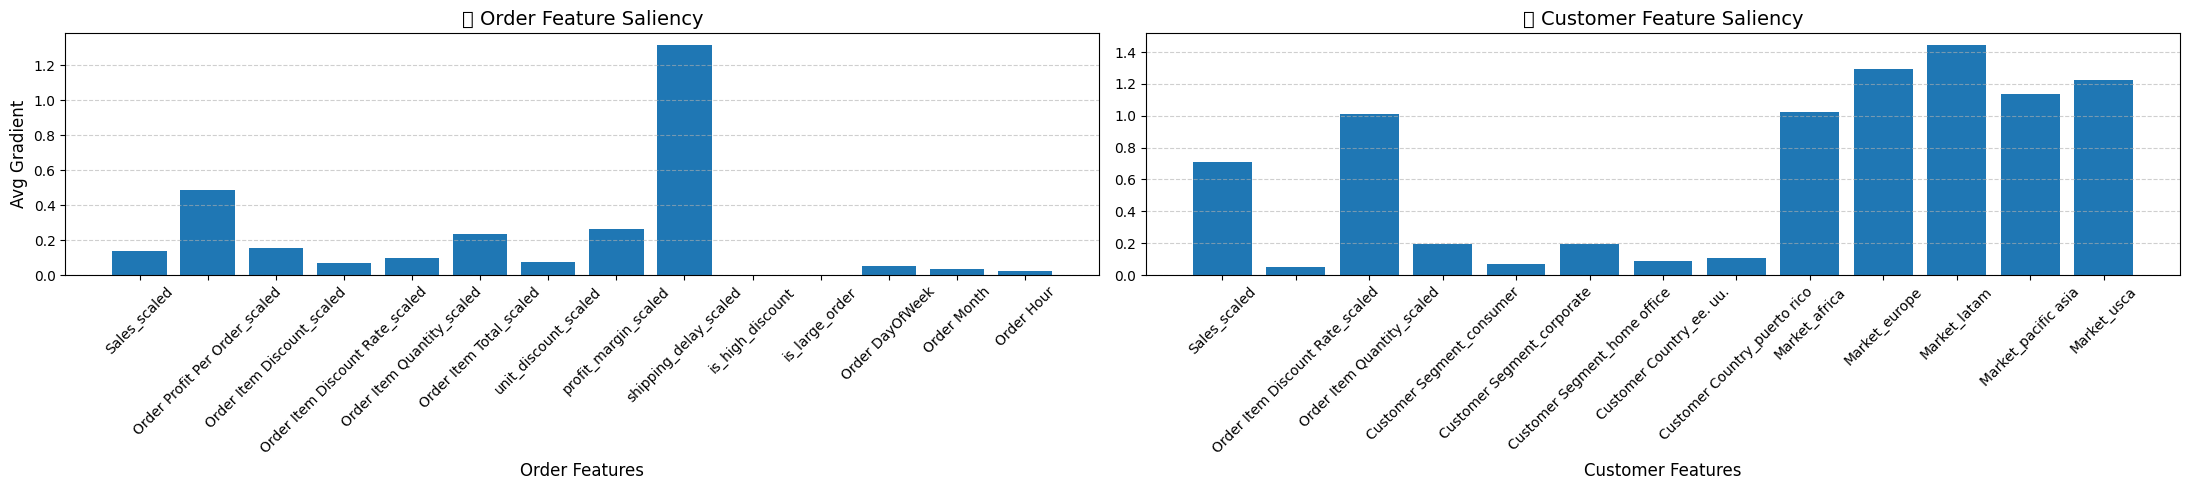

<ipython-input-256-13beff3a78aa>:165: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


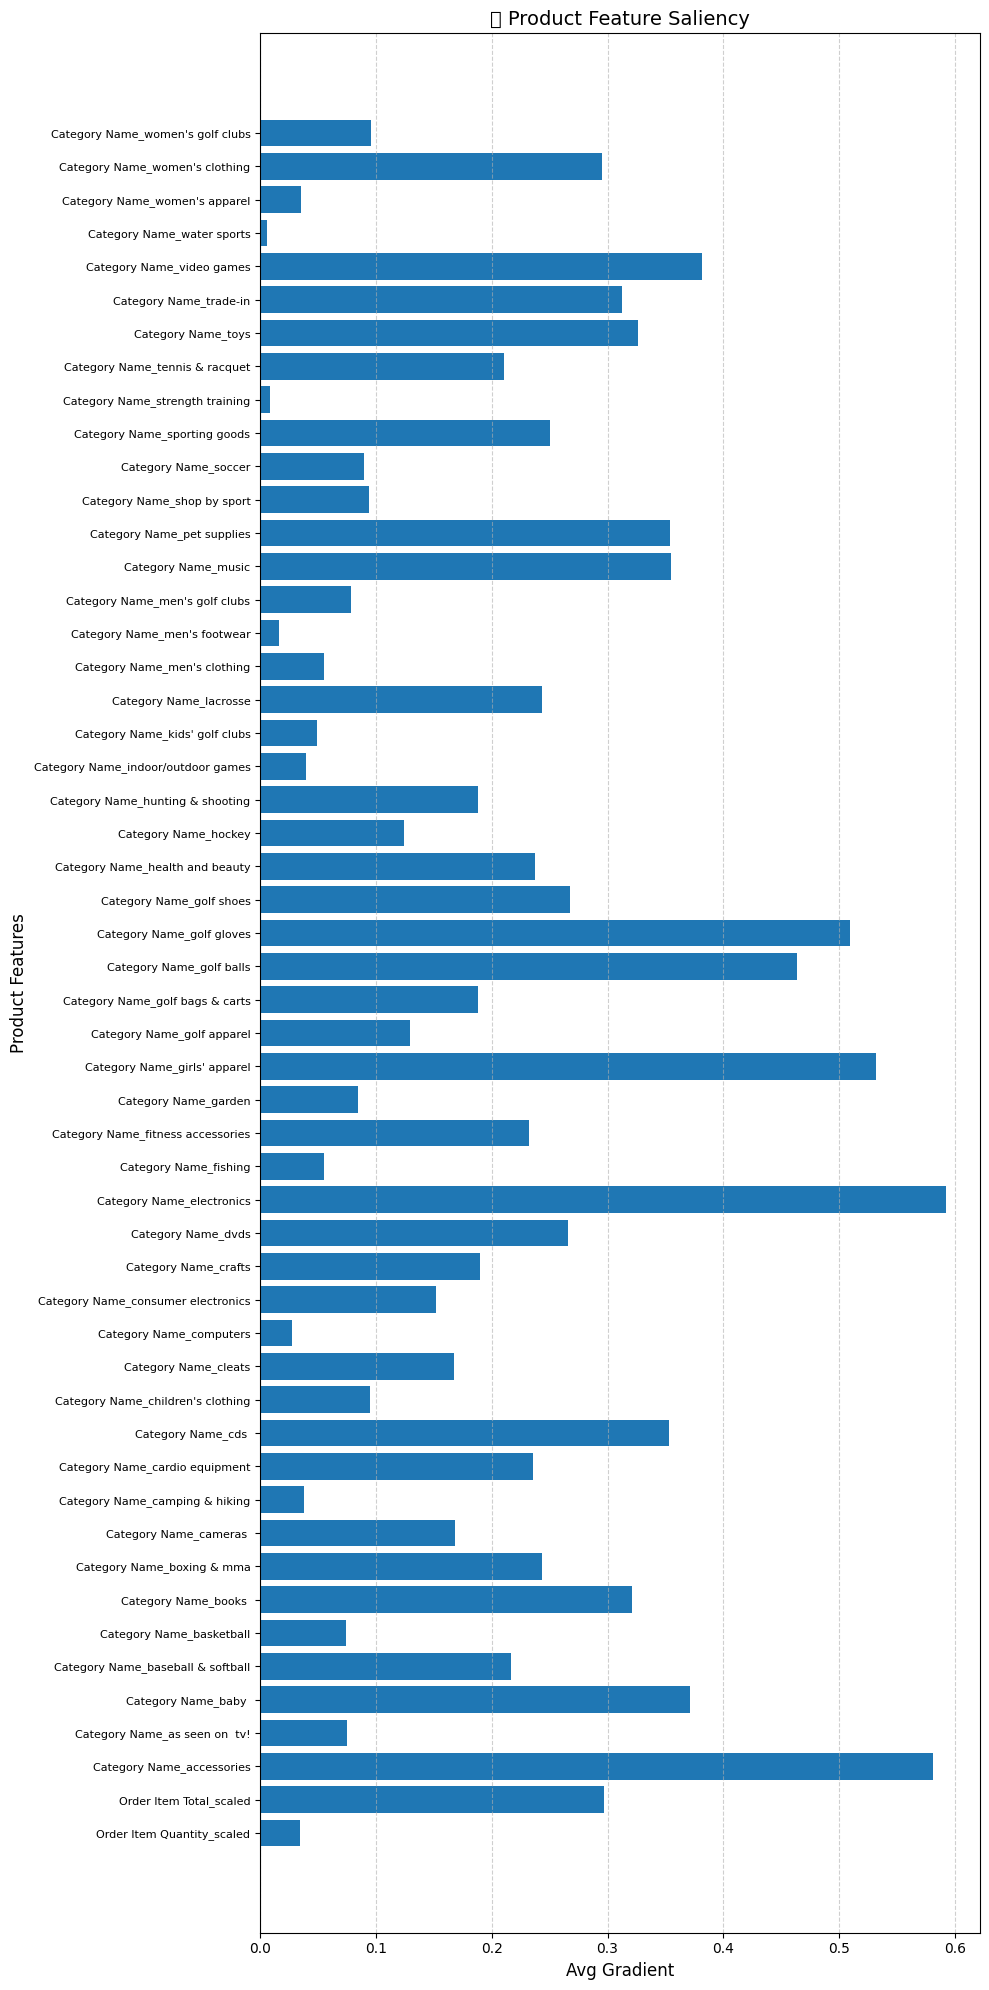

In [256]:
import torch
import matplotlib.pyplot as plt

wrapped_model.eval()

val_mask = data['order'].val_mask
with torch.no_grad():
    logits = wrapped_model(data.x_dict, data.edge_index_dict)
    preds = (torch.sigmoid(logits) > 0.5)
    fraud_indices = (preds[val_mask] == 1).nonzero(as_tuple=True)[0]
    order_indices = torch.arange(data['order'].x.size(0))[val_mask][fraud_indices]

# Edge indices
cust_order_edges = data['customer', 'places', 'order'].edge_index
order_prod_edges = data['order', 'contains', 'product'].edge_index
prod_order_edges = data['product', 'rev_contains', 'order'].edge_index

# Initialize saliency accumulators
order_saliency = torch.zeros(data['order'].x.shape[1])
customer_saliency = torch.zeros(data['customer'].x.shape[1])
product_saliency = torch.zeros(data['product'].x.shape[1])

for idx in order_indices[:50]:  # Limit for efficiency
    x_dict = {k: v.clone().detach().requires_grad_(True) for k, v in data.x_dict.items()}

    out = wrapped_model(x_dict, data.edge_index_dict)
    out[idx].backward(retain_graph=True)

    # Order node
    order_saliency += x_dict['order'].grad[idx].abs()

    # Linked customer node(s)
    cust_ids = cust_order_edges[0][cust_order_edges[1] == idx]
    if len(cust_ids) > 0:
        customer_saliency += x_dict['customer'].grad[cust_ids].abs().mean(dim=0)

    # Linked product node(s) via order → product
    prod_ids_1 = order_prod_edges[1][order_prod_edges[0] == idx]
    if len(prod_ids_1) > 0:
        product_saliency += x_dict['product'].grad[prod_ids_1].abs().mean(dim=0)

    # Linked product node(s) via product → order
    prod_ids_2 = prod_order_edges[0][prod_order_edges[1] == idx]
    if len(prod_ids_2) > 0:
        product_saliency += x_dict['product'].grad[prod_ids_2].abs().mean(dim=0)

    wrapped_model.zero_grad()

# Normalize
n = len(order_indices[:50])
order_saliency /= n
customer_saliency /= n
product_saliency /= n


order_features = [
    'Sales_scaled', 'Order Profit Per Order_scaled', 'Order Item Discount_scaled',
    'Order Item Discount Rate_scaled', 'Order Item Quantity_scaled', 'Order Item Total_scaled',
    'unit_discount_scaled', 'profit_margin_scaled', 'shipping_delay_scaled',
    'is_high_discount', 'is_large_order', 'Order DayOfWeek', 'Order Month', 'Order Hour'
]

customer_features = ['Sales_scaled',
 'Order Item Discount Rate_scaled',
 'Order Item Quantity_scaled',
 'Customer Segment_consumer',
 'Customer Segment_corporate',
 'Customer Segment_home office',
 'Customer Country_ee. uu.',
 'Customer Country_puerto rico',
 'Market_africa',
 'Market_europe',
 'Market_latam',
 'Market_pacific asia',
 'Market_usca']


product_features = ['Order Item Quantity_scaled',
 'Order Item Total_scaled',
 'Category Name_accessories',
 'Category Name_as seen on  tv!',
 'Category Name_baby ',
 'Category Name_baseball & softball',
 'Category Name_basketball',
 'Category Name_books ',
 'Category Name_boxing & mma',
 'Category Name_cameras ',
 'Category Name_camping & hiking',
 'Category Name_cardio equipment',
 'Category Name_cds ',
 "Category Name_children's clothing",
 'Category Name_cleats',
 'Category Name_computers',
 'Category Name_consumer electronics',
 'Category Name_crafts',
 'Category Name_dvds',
 'Category Name_electronics',
 'Category Name_fishing',
 'Category Name_fitness accessories',
 'Category Name_garden',
 "Category Name_girls' apparel",
 'Category Name_golf apparel',
 'Category Name_golf bags & carts',
 'Category Name_golf balls',
 'Category Name_golf gloves',
 'Category Name_golf shoes',
 'Category Name_health and beauty',
 'Category Name_hockey',
 'Category Name_hunting & shooting',
 'Category Name_indoor/outdoor games',
 "Category Name_kids' golf clubs",
 'Category Name_lacrosse',
 "Category Name_men's clothing",
 "Category Name_men's footwear",
 "Category Name_men's golf clubs",
 'Category Name_music',
 'Category Name_pet supplies',
 'Category Name_shop by sport',
 'Category Name_soccer',
 'Category Name_sporting goods',
 'Category Name_strength training',
 'Category Name_tennis & racquet',
 'Category Name_toys',
 'Category Name_trade-in',
 'Category Name_video games',
 'Category Name_water sports',
 "Category Name_women's apparel",
 "Category Name_women's clothing",
 "Category Name_women's golf clubs"]


# Plot all three
import matplotlib.pyplot as plt

# Plot Order and Customer saliency maps
fig, axs = plt.subplots(1, 2, figsize=(22, 5))

# Order saliency
axs[0].bar(order_features, order_saliency.numpy())
axs[0].set_title("🛒 Order Feature Saliency", fontsize=14)
axs[0].set_xlabel("Order Features", fontsize=12)
axs[0].set_ylabel("Avg Gradient", fontsize=12)
axs[0].tick_params(axis='x', rotation=45, labelsize=10)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# Customer saliency
axs[1].bar(customer_features, customer_saliency.numpy())
axs[1].set_title("👤 Customer Feature Saliency", fontsize=14)
axs[1].set_xlabel("Customer Features", fontsize=12)
axs[1].tick_params(axis='x', rotation=45, labelsize=10)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Product saliency — better as horizontal bar chart
plt.figure(figsize=(10, 20))
plt.barh(product_features, product_saliency.numpy())
plt.title("📦 Product Feature Saliency", fontsize=14)
plt.xlabel("Avg Gradient", fontsize=12)
plt.ylabel("Product Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


## Organized graphs

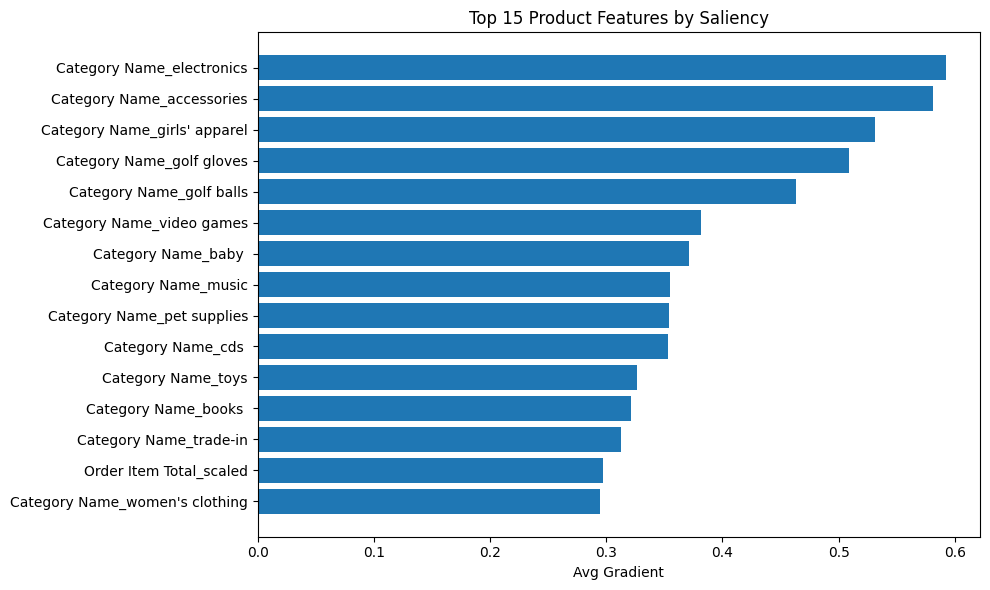

In [257]:
import torch
import matplotlib.pyplot as plt

# Number of top features to display
top_n = 15

# Sort saliency scores
topk_indices = torch.topk(product_saliency, top_n).indices
topk_values = product_saliency[topk_indices]
topk_labels = [product_features[i] for i in topk_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(topk_labels[::-1], topk_values.numpy()[::-1])  # reversed for descending order
plt.title("Top 15 Product Features by Saliency")
plt.xlabel("Avg Gradient")
plt.tight_layout()
plt.show()


<ipython-input-258-7ee9428fc7c6>:19: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


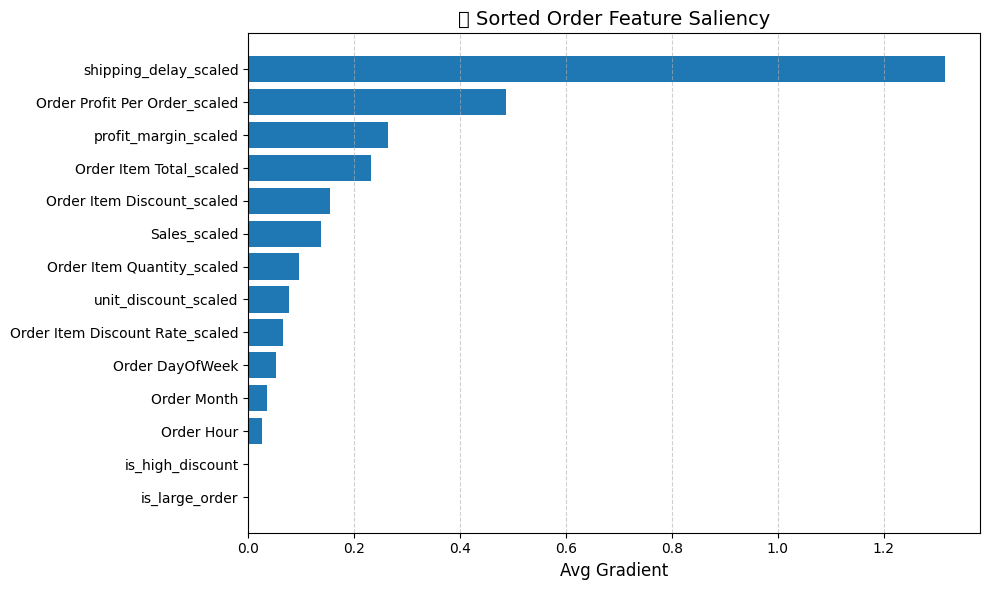

<ipython-input-258-7ee9428fc7c6>:28: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


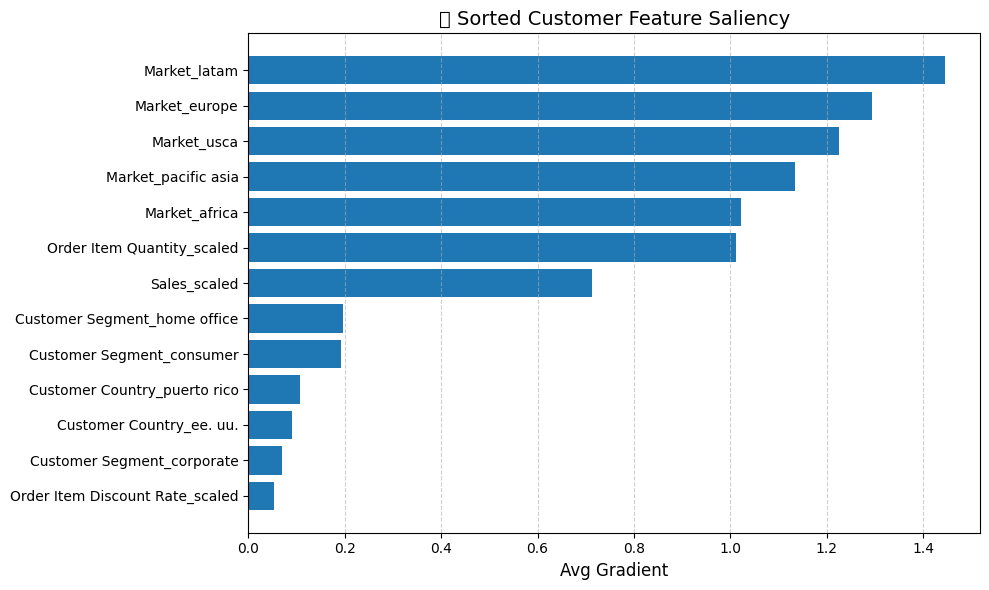

In [258]:
# Sort and plot ORDER and CUSTOMER saliency horizontally, sorted by importance

# Sort saliency
order_sorted = torch.argsort(order_saliency, descending=True)
customer_sorted = torch.argsort(customer_saliency, descending=True)

order_saliency_sorted = order_saliency[order_sorted]
customer_saliency_sorted = customer_saliency[customer_sorted]

order_features_sorted = [order_features[i] for i in order_sorted]
customer_features_sorted = [customer_features[i] for i in customer_sorted]

# Plot ORDER saliency
plt.figure(figsize=(10, 6))
plt.barh(order_features_sorted[::-1], order_saliency_sorted.numpy()[::-1])
plt.title("🛒 Sorted Order Feature Saliency", fontsize=14)
plt.xlabel("Avg Gradient", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot CUSTOMER saliency
plt.figure(figsize=(10, 6))
plt.barh(customer_features_sorted[::-1], customer_saliency_sorted.numpy()[::-1])
plt.title("👤 Sorted Customer Feature Saliency", fontsize=14)
plt.xlabel("Avg Gradient", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Group categories
Testing if categories can be grouped for readability

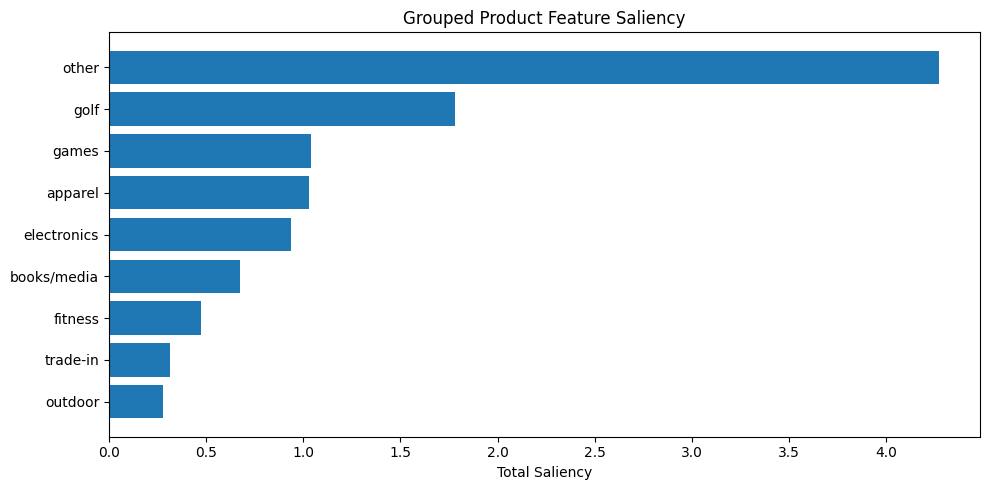

In [259]:
from collections import defaultdict

groupings = {
    'golf': ['golf', 'putter', 'tee'],
    'electronics': ['electronics', 'camera', 'computers'],
    'apparel': ['clothing', 'apparel', 'footwear'],
    'fitness': ['fitness', 'cardio', 'training', 'strength'],
    'games': ['games', 'video', 'cds', 'dvds'],
    'outdoor': ['camping', 'hiking', 'hunting', 'fishing'],
    'books/media': ['books', 'music', 'dvds'],
    'home/office': ['home office'],
    'trade-in': ['trade-in'],
    'other': []  # catch-all
}


group_saliency = defaultdict(float)

for feature, score in zip(product_features, product_saliency.numpy()):
    matched = False
    for group, keywords in groupings.items():
        if any(keyword in feature.lower() for keyword in keywords):
            group_saliency[group] += score
            matched = True
            break
    if not matched:
        group_saliency['other'] += score  # fallback group

# Plot the grouped saliency
import matplotlib.pyplot as plt

labels, scores = zip(*sorted(group_saliency.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 5))
plt.barh(labels[::-1], scores[::-1])  # reverse to show highest on top
plt.title("Grouped Product Feature Saliency")
plt.xlabel("Total Saliency")
plt.tight_layout()
plt.show()


# RL-GNNExplainer-style Agent

In [265]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RLStochasticMultiNodeExplainer(nn.Module):
    def __init__(self, input_dims, hidden_dim=64):
        """
        input_dims: dict with keys 'order', 'customer', 'product'
                    each maps to the feature dimension of that node type
        """
        super().__init__()
        self.policies = nn.ModuleDict({
            node_type: nn.Sequential(
                nn.Linear(input_dims[node_type], hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, input_dims[node_type]),
                nn.Sigmoid()
            )
            for node_type in input_dims
        })

    def forward(self, x_dict):
        """
        Returns a dict of feature masks per node type
        """
        return {
            node_type: self.policies[node_type](x_dict[node_type])
            for node_type in x_dict
        }

def train_rl_explainer_on_multiple_frauds(agent, gnn_model, data, fraud_indices, lr=1e-2, epochs=100):
    optimizer = torch.optim.Adam(agent.parameters(), lr=lr)
    gnn_model.eval()

    feature_accumulator = {
        node_type: torch.zeros(data[node_type].x.shape[1]).to(data[node_type].x.device)
        for node_type in data.node_types
    }

    for target_idx in fraud_indices[:10]:  # loop over 10 fraudulent nodes
        for epoch in range(epochs):
            optimizer.zero_grad()

            # Input dicts
            x_dict = {
                k: v.x.clone().detach().requires_grad_(False)
                for k, v in data.items()
            }

            # Get feature masks
            mask_probs = agent({k: v for k, v in x_dict.items()})
            bernoulli = {k: torch.distributions.Bernoulli(probs=v) for k, v in mask_probs.items()}
            sampled_masks = {k: dist.sample() for k, dist in bernoulli.items()}

            # Apply masks
            masked_x = {
                k: x_dict[k] * sampled_masks[k]
                for k in x_dict
            }

            # Predict
            out = gnn_model(masked_x, data.edge_index_dict)
            target_logit = out[target_idx]
            target_prob = torch.sigmoid(target_logit)

            target_label = (target_prob > 0.5).float().detach()
            reward = -F.binary_cross_entropy(target_prob, target_label)

            # Compute REINFORCE loss
            log_probs = sum(
                (dist.log_prob(sample)).sum()
                for dist, sample in zip(bernoulli.values(), sampled_masks.values())
            )
            loss = -reward * log_probs
            loss.backward()
            optimizer.step()

        # Accumulate masks after training for this node
        with torch.no_grad():
            final_masks = agent({k: data[k].x for k in data.node_types})
            for k in feature_accumulator:
                feature_accumulator[k] += final_masks[k].mean(dim=0)

    # Normalize
    for k in feature_accumulator:
        feature_accumulator[k] /= len(fraud_indices[:10])

    return feature_accumulator


In [266]:
def train_rl_explainer_with_aggregation(agent, gnn_model, data, target_node_idx, target_output, lr=1e-2, epochs=100, lambda_sparse=1e-3):
    optimizer = torch.optim.Adam(agent.parameters(), lr=lr)
    gnn_model.eval()

    cust_edge = data['customer', 'places', 'order'].edge_index
    prod_edge = data['product', 'rev_contains', 'order'].edge_index

    cust_ids = cust_edge[0][cust_edge[1] == target_node_idx]
    prod_ids = prod_edge[0][prod_edge[1] == target_node_idx]

    for epoch in range(epochs):
        optimizer.zero_grad()

        # Mean over all linked nodes instead of just one
        x_input = {
            'order': data['order'].x[target_node_idx],
        }
        if len(cust_ids) > 0:
            x_input['customer'] = data['customer'].x[cust_ids].mean(dim=0)
        if len(prod_ids) > 0:
            x_input['product'] = data['product'].x[prod_ids].mean(dim=0)

        mask_probs = agent(x_input)
        sampled_masks = {k: torch.bernoulli(p) for k, p in mask_probs.items()}

        # Apply masks
        masked_x = {k: v.clone() for k, v in data.x_dict.items()}
        masked_x['order'][target_node_idx] *= sampled_masks['order']

        if 'customer' in sampled_masks and len(cust_ids) > 0:
            for cid in cust_ids:
                masked_x['customer'][cid] *= sampled_masks['customer']
        if 'product' in sampled_masks and len(prod_ids) > 0:
            for pid in prod_ids:
                masked_x['product'][pid] *= sampled_masks['product']

        pred = gnn_model(masked_x, data.edge_index_dict)[target_node_idx]
        pred_prob = torch.sigmoid(pred)

        # Reward: accuracy + sparsity penalty
        reward = -F.binary_cross_entropy(pred_prob, target_output.detach())

        loss = 0
        for k in sampled_masks:
            dist = torch.distributions.Bernoulli(probs=mask_probs[k])
            log_prob = dist.log_prob(sampled_masks[k])
            loss -= reward * log_prob.sum()

            # Sparsity penalty
            loss += lambda_sparse * sampled_masks[k].sum()

        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Reward: {reward.item():.4f}, Mask sum: " +
                  ", ".join(f"{k}: {sampled_masks[k].sum().item():.2f}" for k in sampled_masks))

    return agent


In [267]:
def average_rl_explainability(agent_class, train_fn, gnn_model, data, dims, num_nodes=10, epochs=100):
    wrapped_model.eval()
    with torch.no_grad():
        logits = gnn_model(data.x_dict, data.edge_index_dict)
        pred_probs = torch.sigmoid(logits)
        fraud_indices = ((pred_probs > 0.5) & data['order'].val_mask).nonzero(as_tuple=True)[0]

    avg_masks = {k: torch.zeros(d) for k, d in dims.items()}
    count = 0

    for i in range(min(num_nodes, len(fraud_indices))):
        idx = fraud_indices[i]
        target_output = pred_probs[idx]

        agent = agent_class(dims)
        trained_agent = train_fn(agent, gnn_model, data, idx, target_output, epochs=epochs)

        # Use averaged neighbors here too
        with torch.no_grad():
            cust_ids = data['customer', 'places', 'order'].edge_index[0][data['customer', 'places', 'order'].edge_index[1] == idx]
            prod_ids = data['product', 'rev_contains', 'order'].edge_index[0][data['product', 'rev_contains', 'order'].edge_index[1] == idx]

            x_input = {'order': data['order'].x[idx]}
            if len(cust_ids) > 0:
                x_input['customer'] = data['customer'].x[cust_ids].mean(dim=0)
            if len(prod_ids) > 0:
                x_input['product'] = data['product'].x[prod_ids].mean(dim=0)

            mask_probs = trained_agent(x_input)

        for k in mask_probs:
            avg_masks[k] += mask_probs[k]
        count += 1

    for k in avg_masks:
        avg_masks[k] /= count

    # Print top features
    for node_type, mask in avg_masks.items():
        print(f"\n🔍 Avg Top 10 Features for {node_type.upper()} (across {count} nodes):")
        topk = torch.topk(mask, 10)
        feature_names = {
            'order': order_features,
            'customer': customer_features,
            'product': product_features
        }[node_type]
        for i in range(10):
            idx = topk.indices[i].item()
            score = topk.values[i].item()
            print(f"{feature_names[idx]}: {score:.4f}")

    return avg_masks


In [268]:
dims = {
    'order': data['order'].x.shape[1],
    'customer': data['customer'].x.shape[1],
    'product': data['product'].x.shape[1],
}

avg_masks = average_rl_explainability(
    agent_class=RLStochasticMultiNodeExplainer,
    train_fn=train_rl_explainer_with_aggregation,
    gnn_model=wrapped_model,
    data=data,
    dims=dims,
    num_nodes=10,
    epochs=100
)


Epoch 0, Reward: -0.5655, Mask sum: order: 6.00, customer: 7.00, product: 29.00
Epoch 10, Reward: -0.3274, Mask sum: order: 8.00, customer: 9.00, product: 26.00
Epoch 20, Reward: -0.3105, Mask sum: order: 8.00, customer: 6.00, product: 25.00
Epoch 30, Reward: -0.3062, Mask sum: order: 8.00, customer: 7.00, product: 25.00
Epoch 40, Reward: -0.3085, Mask sum: order: 9.00, customer: 5.00, product: 28.00
Epoch 50, Reward: -0.3062, Mask sum: order: 9.00, customer: 7.00, product: 22.00
Epoch 60, Reward: -0.3110, Mask sum: order: 9.00, customer: 6.00, product: 28.00
Epoch 70, Reward: -0.3085, Mask sum: order: 9.00, customer: 6.00, product: 30.00
Epoch 80, Reward: -0.3051, Mask sum: order: 10.00, customer: 8.00, product: 26.00
Epoch 90, Reward: -0.3085, Mask sum: order: 9.00, customer: 6.00, product: 25.00
Epoch 0, Reward: -0.8673, Mask sum: order: 6.00, customer: 8.00, product: 21.00
Epoch 10, Reward: -0.6086, Mask sum: order: 8.00, customer: 8.00, product: 29.00
Epoch 20, Reward: -0.6228, Ma

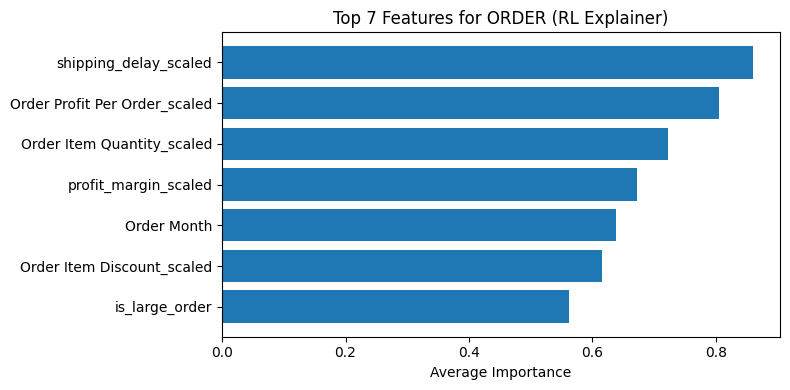

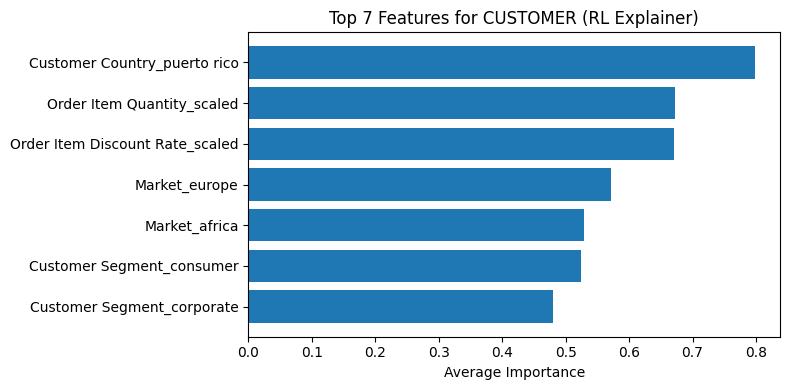

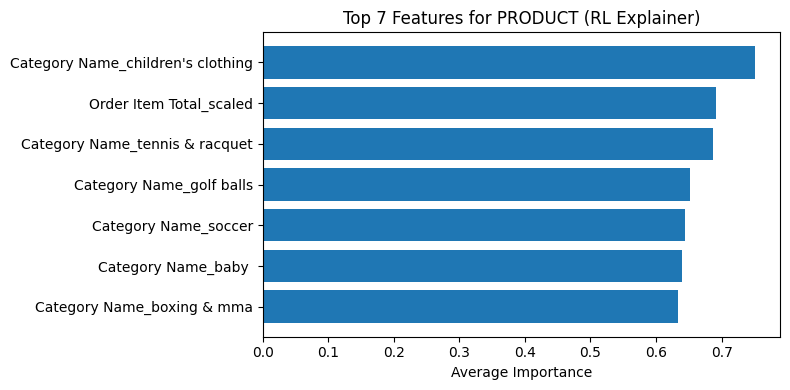

In [271]:
import matplotlib.pyplot as plt

def plot_top5_features_per_node(avg_masks, feature_names_dict):
    for node_type, mask in avg_masks.items():
        topk = torch.topk(mask, 7)
        values = topk.values.cpu().numpy()
        indices = topk.indices.cpu().numpy()
        labels = [feature_names_dict[node_type][i] for i in indices]

        plt.figure(figsize=(8, 4))
        plt.barh(labels[::-1], values[::-1])
        plt.xlabel("Average Importance")
        plt.title(f"Top 7 Features for {node_type.upper()} (RL Explainer)")
        plt.tight_layout()
        plt.show()
feature_names_dict = {
    'order': order_features,      # list of order feature names
    'customer': customer_features,
    'product': product_features
}

plot_top5_features_per_node(avg_masks, feature_names_dict)
